# Initial setup
- We will use the following libraries in this homework:

    - numpy

    - matplotlib

  If you want to run the code on your computer,  please install the requirement libraries by typing the following commend line in you terminal.

```
pip install [library_name] 
```





In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

#Building environment

In this homework, we are going to implement a 6-armed bandit problem with mean:

$q_*(1)$ |$q_*(2)$ |$q_*(3)$ |$q_*(4)$ |$q_*(5)$ |$q_*(6)$  
:--:|:--:|:--:|:--:|:--:|:--:
0.3|-5|5|-1.1|1|0
<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|<img width=50/>|

  When you chooce the $n^{th}$ bandit , the reward should be given by a normal distribution with mean $q_∗(n)$ and variance 1.



In [2]:
class bandit:

  # initialize the means and variance of the bandit
  def __init__(self, mean=[0.3, -5, 5, -1.1, 1, 0], variance = 1):
    self.mean = mean
    self.banditNums = len(mean)
    self.variance = variance

  #give a action, recieve a reward
  def step(self, action):

    # where action is the chosen bandit (i.e. action is between 0~5)
    # To return a number from a normal distribution, you might want to call the function rd.normal().
    
    ######## your code here ##########
    reward = rd.normal(self.mean[action], self.variance)



    ######################################

    return reward


#implement learing process

The learning process in this homework is relatively simple:
1. Choose an action:
  
  Generally speaking, it is better to always choose the best option, but in order to keep the exporation going, we sometimes choose random action with a probability of $\epsilon$.

2. Update the action values:

  After receiving the reward, we will update the action value. In this homework we simply use the average reward as the the action value. Try using the following relationship when updating.

  $NewEstimate\leftarrow OleEstimate + StepSize\bigg[Target - OldEstimate\bigg].$

  $Q_{n+1} = 1/n\times\bigg[R_n - Q_n\bigg]$


In [3]:
class learning:


  def __init__(self):
    self.env = bandit()
    self.actionValues = [0,0,0,0,0,0]
    self.chosenTimes = [0,0,0,0,0,0]

  def chooseAction(self, epsilon):
    
    # To generate random numbers, check out rd.random() and rd.randint().
    # And to find the action with maximum value (from self.actionValues), you can use np.argmax().

    ######## your code here ##########
    prob = rd.random()
    
    if prob < epsilon:
        action = rd.randint(self.env.banditNums)
    else:
        action = np.argmax(self.actionValues)

    ######################################
    return action

  def updateValue(self, action, reward):

    # This is how many times you have chosen this action.

    self.chosenTimes[action] +=1

    # Now, update the action value(self.actionValues[action]) with the average reward of this action.

    ######## your code here ##########
    self.actionValues[action] += (reward-self.actionValues[action])/self.chosenTimes[action]


    ######################################

  def run(self, steps, epsilon):
    self.actionValues = [0,0,0,0,0,0]
    self.chosenTimes = [0,0,0,0,0,0]
    averageRewards = []
    rewards = []
    for _ in range(steps):
      action = self.chooseAction(epsilon)
      reward = self.env.step(action)
      rewards.append(reward)
      averageRewards.append(np.average(rewards))
      self.updateValue(action, reward)
    
    return rewards, averageRewards

# Test your results
- We will use 'matplotlib' to visualize the result. For more information, click on the [LINK](https://matplotlib.org/2.0.2/api/pyplot_api.html) to see the documentation or search tutorials online.

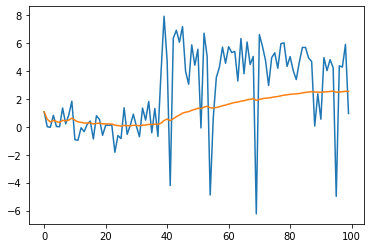

In [4]:
HW1 = learning()

# You might want to modify the following code to get different figure for the report.

## rewards, averageRewards = HW1.run(steps = 100, epsilon = 0.5)
rewards, averageRewards = HW1.run(steps = 100, epsilon = 0.1)
plt.figure()
plt.plot(rewards)
plt.plot(averageRewards)
plt.show()
